# Importing Libraries

In [ ]:
!pip install pyfinance
!pip install py_vollib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.0 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=a4fe9c930bb8482be6f81c440eee8b43661d6fd44863475202547c14053bd7c2
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=54c257aa7b3bf85dada8c86e8d242d787ece78516add53bb9d1c275b3efb359a
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [ ]:
import math
import pyfinance
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from pyfinance.options import BSM
from py_vollib.black_scholes.implied_volatility import implied_volatility


/usr/local/lib/python3.10/dist-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


# (1.) Pick a stock of your choice which is being traded in the derivative market.

In [ ]:
# Step 1: Pick a stock
stock_symbol = "AAPL"  # Example stock symbol

# Step 2: Look at the stock's and option's history on YAHOO Finance
stock_data = yf.download(stock_symbol, start="2023-04-01", end="2024-04-01")

[*********************100%%**********************]  1 of 1 completed


# (2.) Look at the stock’s and option’s history on YAHOO Finance.


In [ ]:
# Print stock data
print("Stock Data:")
print(stock_data.head())

Stock Data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-03  164.270004  166.289993  164.220001  166.169998  165.287750   
2023-04-04  166.600006  166.839996  165.110001  165.630005  164.750626   
2023-04-05  164.740005  165.050003  161.800003  163.759995  162.890533   
2023-04-06  162.429993  164.960007  162.000000  164.660004  163.785767   
2023-04-10  161.419998  162.029999  160.080002  162.029999  161.169724   

              Volume  
Date                  
2023-04-03  56976200  
2023-04-04  46278300  
2023-04-05  51511700  
2023-04-06  45390100  
2023-04-10  47716900  


In [ ]:
options_data_july = pd.read_csv('apple_july24_options.csv')

print("Options chain for JULY 2024 expiry")
print()

print(options_data_july.head())

Options chain for JULY 2024 expiry

   Strike Moneyness    Bid    Mid    Ask   Last Change     %Chg Volume  \
0     120   +29.15%  50.95  51.23  51.50  58.00   unch     unch      0   
1     125   +26.20%  46.15  46.43  46.70  51.95   unch     unch      0   
2     130   +23.25%  41.35  41.63  41.90  45.37   unch     unch      7   
3     135   +20.30%  36.70  36.90  37.10  43.96   unch     unch      0   
4     140   +17.35%  32.10  32.28  32.45  32.14   -6.4  -16.61%      4   

  Open Int OI Chg    Delta      IV  Type Last Trade  
0       33   unch  0.96812  39.90%  Call   04/12/24  
1      503   unch  0.95842  37.91%  Call   04/11/24  
2      391     -1  0.94759  35.52%  Call   04/12/24  
3       58   unch  0.93163  33.54%  Call   04/12/24  
4      175     +6  0.91511  30.84%  Call   04/16/24  


In [ ]:
options_data_oct = pd.read_csv('apple_oct24_options.csv')

print("Options chain for OCT 2024 expiry")
print()

print(options_data_oct)

Options chain for OCT 2024 expiry

    Strike Moneyness    Bid    Mid    Ask   Last  Change     %Chg Volume  \
0      120   +29.16%  53.20  53.50  53.80  56.43    unch     unch      0   
1      125   +26.21%  48.75  48.93  49.10  48.35  +48.35     unch      2   
2      130   +23.25%  44.20  44.38  44.55  46.00    -1.6   -3.36%     20   
3      135   +20.30%  39.70  39.88  40.05  38.86   -7.64  -16.43%      1   
4      140   +17.35%  35.55  35.63  35.70  35.00   -7.08  -16.83%     54   
5      145   +14.40%  31.35  31.43  31.50  35.80    unch     unch      1   
6      150   +11.45%  27.30  27.40  27.50  26.50    -4.1  -13.40%    100   
7      155    +8.50%  23.50  23.60  23.70  23.95   -2.45   -9.28%      4   
8      160    +5.54%  20.00  20.08  20.15  19.79   -2.86  -12.63%     15   
9      165    +2.59%  16.70  16.78  16.85  16.65   -2.05  -10.96%     79   
10     170    -0.36%  13.75  13.83  13.90  13.70   -2.35  -14.64%    118   
11     175    -3.31%  11.15  11.20  11.25  11.20   -2

In [ ]:
options_data_oct = pd.read_csv('apple_mar25_options.csv')

print("Options chain for March 2025 expiry")
print()

print(options_data_oct)

Options chain for March 2025 expiry

    Strike Moneyness    Bid    Mid    Ask   Last Change     %Chg  Volume  \
0      120   +29.32%  56.45  56.68  56.90  62.50   unch     unch      11   
1      125   +26.38%  52.05  52.33  52.60  57.90   unch     unch       4   
2      130   +23.43%  47.95  48.15  48.35  48.20  -3.43   -6.64%      48   
3      135   +20.49%  44.05  44.18  44.30  50.02   unch     unch       3   
4      140   +17.55%  40.10  40.23  40.35  40.20  -3.34   -7.67%     242   
5      145   +14.60%  36.25  36.45  36.65  40.48   unch     unch       1   
6      150   +11.66%  32.55  32.70  32.85  32.65  -5.06  -13.42%   1,012   
7      155    +8.71%  29.05  29.18  29.30  31.45   unch     unch       9   
8      160    +5.77%  25.80  25.90  26.00  25.15   -3.6  -12.52%       3   
9      165    +2.82%  22.70  22.80  22.90  22.30  -2.55  -10.26%      14   
10     170    -0.12%  19.85  19.93  20.00  19.92     -2   -9.12%     186   
11     175    -3.07%  17.15  17.28  17.40  17.55   

# (3.) Use past one-year data to estimate the annual volatility.

In [ ]:
# Step 3: Estimate annual volatility using log returns
log_returns = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1)).dropna()
trading_days = len(log_returns)
print("No of Trading days :-", trading_days)
annual_volatility = round(log_returns.std() * np.sqrt(trading_days), 2)
print("Annual Volatility :-", annual_volatility)

No of Trading days :- 248
Annual Volatility :- 0.19


## Plot

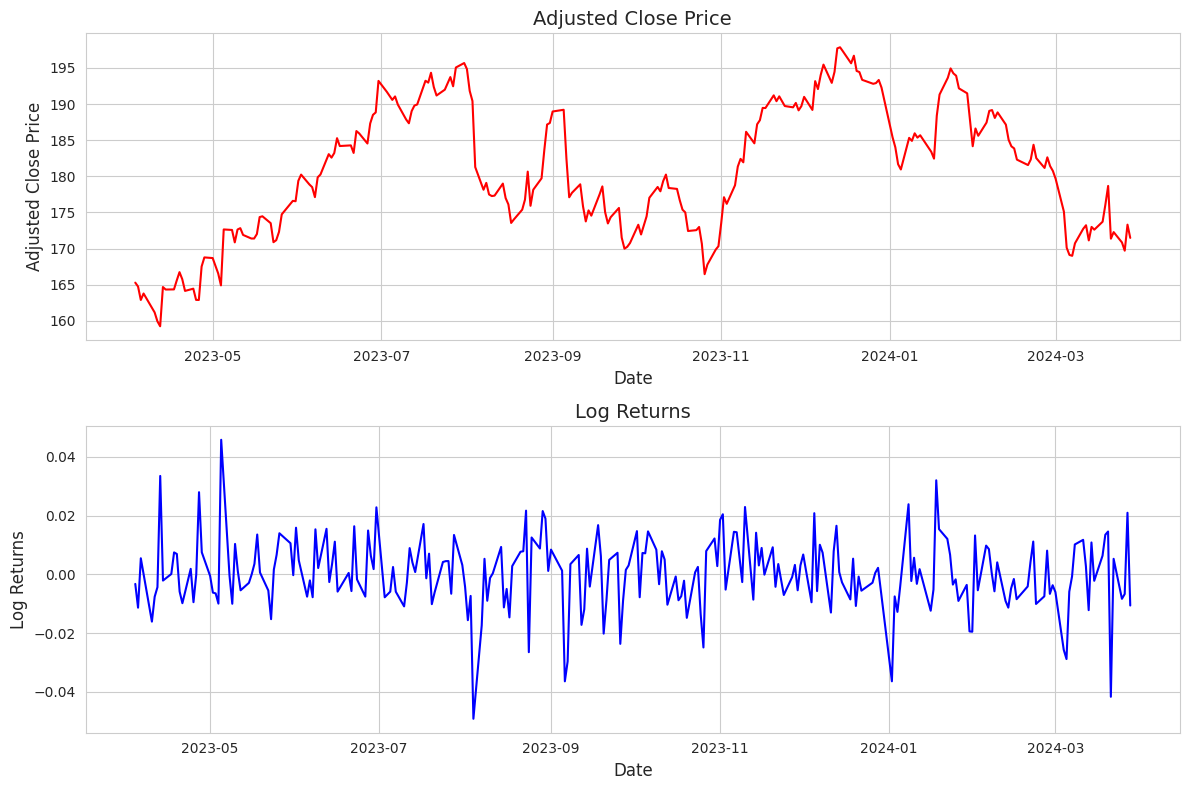

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 8))

# Plot adjusted stock price
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['Adj Close'], color='red')
plt.title('Adjusted Close Price', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot log returns
plt.subplot(2, 1, 2)
plt.plot(log_returns.index, log_returns, color='blue')
plt.title('Log Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# (4.) Use 10 years’ US treasury rate as the rate of interest.

In [ ]:
treasury_rate = 0.0456  # Example 10-year US Treasury rate (0.046 = 4.56%)
print("10-Year US Treasury Rate:", treasury_rate)

10-Year US Treasury Rate: 0.0456


# (5.) Now fix different strike prices and time of maturity to evaluate the call/ put option price by using Binomial model

In [ ]:
def binomial_coefficient(n, k):
    """Calculate binomial coefficient (n choose k)."""
    return math.factorial(n) / (math.factorial(n - k) * math.factorial(k))

def binomial_option_price(S0, K, T, r, sigma, N, option_type='call'):
    """
    Calculate the European call or put option price using the binomial model.

    Parameters:
        S0 (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility of the stock
        N (int): Number of time steps
        option_type (str): Type of option, either 'call' or 'put'

    Returns:
        float: European option price
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)

    option_price = 0
    for k in range(N + 1):
        p_k = binomial_coefficient(N, k) * p**k * (1 - p)**(N - k)
        S_k = S0 * (u)**(2 * k - N)
        if option_type == 'call':
            option_price += max(S_k - K, 0) * p_k
        elif option_type == 'put':
            option_price += max(K - S_k, 0) * p_k

    option_price *= np.exp(-r * T)

    return option_price

In [ ]:
# Parameters
S0 = round(stock_data['Adj Close'].iloc[-1], 2)  # Current stock price
r = round(treasury_rate, 2)  # Risk-free rate
sigma = annual_volatility  # Volatility
N = 1000  # Number of time steps
print("Current Stock Price :-", S0)
print("Risk-free rate :-", r)
print("Sigma :-",sigma)
print("No of steps in binomial model :-",N)
print()


# Different strike prices and time periods
strike_prices = [150, 160, 170, 180, 190]
maturities = [1/2, 1, 2, 3, 4]

# Lists to store option prices for each strike price
call_prices = {K: [] for K in strike_prices}
put_prices = {K: [] for K in strike_prices}

# Calculate and print option prices for each combination of strike prices and maturities
for K in strike_prices:
    for T in maturities:
        call_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
        put_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
        print(f"Strike Price: {K}, Maturity: {T}, Call Price: {round(call_price, 2)}, Put Price: {round(put_price, 2)}")
        call_prices[K].append(call_price)
        put_prices[K].append(put_price)
    print()

Current Stock Price :- 171.48
Risk-free rate :- 0.05
Sigma :- 0.19
No of steps in binomial model :- 1000

Strike Price: 150, Maturity: 0.5, Call Price: 26.42, Put Price: 1.24
Strike Price: 150, Maturity: 1, Call Price: 31.42, Put Price: 2.63
Strike Price: 150, Maturity: 2, Call Price: 40.08, Put Price: 4.32
Strike Price: 150, Maturity: 3, Call Price: 47.6, Put Price: 5.22
Strike Price: 150, Maturity: 4, Call Price: 54.37, Put Price: 5.7

Strike Price: 160, Maturity: 0.5, Call Price: 18.56, Put Price: 3.13
Strike Price: 160, Maturity: 1, Call Price: 24.22, Put Price: 4.94
Strike Price: 160, Maturity: 2, Call Price: 33.47, Put Price: 6.76
Strike Price: 160, Maturity: 3, Call Price: 41.36, Put Price: 7.59
Strike Price: 160, Maturity: 4, Call Price: 48.42, Put Price: 7.94

Strike Price: 170, Maturity: 0.5, Call Price: 12.15, Put Price: 6.47
Strike Price: 170, Maturity: 1, Call Price: 18.09, Put Price: 8.32
Strike Price: 170, Maturity: 2, Call Price: 27.61, Put Price: 9.95
Strike Price: 170

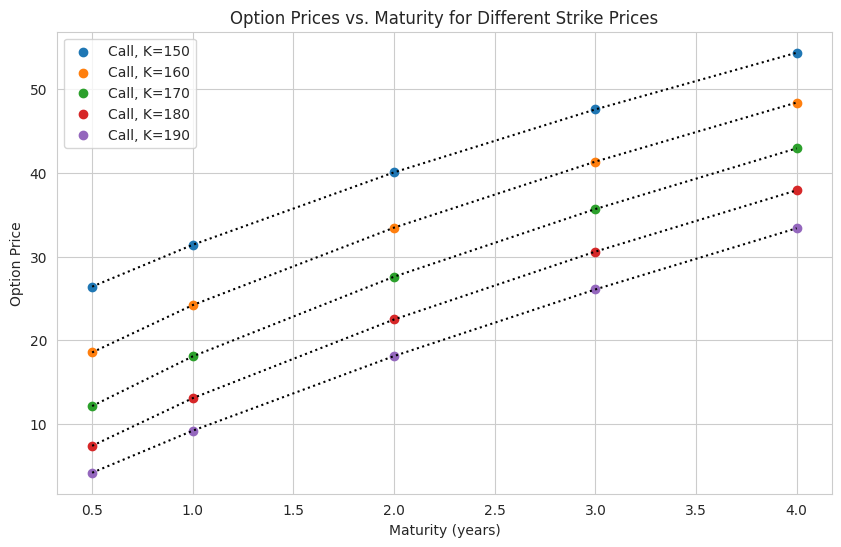

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

for K in strike_prices:
    plt.scatter(maturities, call_prices[K], label=f'Call, K={K}')
    plt.plot(maturities, call_prices[K], linestyle='dotted', color='black')  # Connect scatter points with dotted lines
    # plt.scatter(maturities, put_prices[K], label=f'Put, K={K}')

plt.title('Option Prices vs. Maturity for Different Strike Prices')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


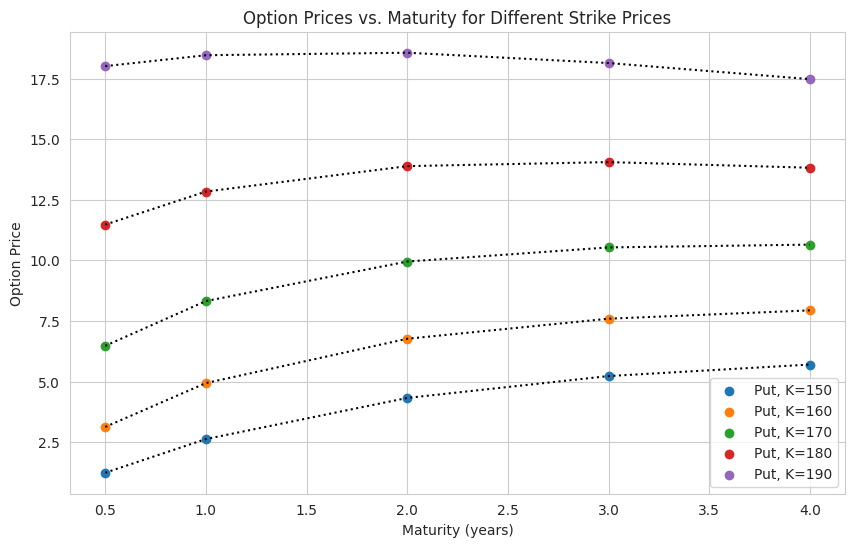

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

for K in strike_prices:
    plt.scatter(maturities, put_prices[K], label=f'Put, K={K}')
    plt.plot(maturities, put_prices[K], linestyle='dotted', color='black')  # Connect scatter points with dotted lines

plt.title('Option Prices vs. Maturity for Different Strike Prices')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Initialize lists to store data
strike_prices_list = []
maturities_list = []
call_prices_list = []
put_prices_list = []

# Calculate and store option prices using binomial option pricing for each combination of strike prices and maturities
for K in strike_prices:
    for T in maturities:
        call_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
        put_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')

        # Append values to respective lists
        strike_prices_list.append(K)
        maturities_list.append(T)
        call_prices_list.append(round(call_price, 2))
        put_prices_list.append(round(put_price, 2))

# Create a DataFrame
option_df = pd.DataFrame({
    'Strike Price': strike_prices_list,
    'Maturity': maturities_list,
    'Call Price': call_prices_list,
    'Put Price': put_prices_list
})

print("Predicted options prices for fixed strike price and time of maturity :- ")
print()
print(option_df)

Predicted options prices for fixed strike price and time of maturity :- 

    Strike Price  Maturity  Call Price  Put Price
0            150       0.5       26.42       1.24
1            150       1.0       31.42       2.63
2            150       2.0       40.08       4.32
3            150       3.0       47.60       5.22
4            150       4.0       54.37       5.70
5            160       0.5       18.56       3.13
6            160       1.0       24.22       4.94
7            160       2.0       33.47       6.76
8            160       3.0       41.36       7.59
9            160       4.0       48.42       7.94
10           170       0.5       12.15       6.47
11           170       1.0       18.09       8.32
12           170       2.0       27.61       9.95
13           170       3.0       35.69      10.53
14           170       4.0       42.94      10.65
15           180       0.5        7.40      11.47
16           180       1.0       13.10      12.84
17           180       2.0

# (6.) Evaluate the option price by using Black Scholes Formula

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the price of a European call or put option using the Black-Scholes formula.

    Parameters:
        S (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility of the stock
        option_type (str): Type of option, either 'call' or 'put'

    Returns:
        float: Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    return option_price

In [ ]:
# Parameters
S0 = round(stock_data['Adj Close'].iloc[-1], 2)  # Current stock price
r = round(treasury_rate, 2)  # Risk-free rate
sigma = annual_volatility  # Volatility
N = 1000  # Number of time steps
print("Current Stock Price :-", S0)
print("Risk-free rate :-", r)
print("Sigma :-",sigma)
print()

# Different strike prices and time periods
strike_prices = [150, 160, 170, 180, 190]
maturities = [1/2, 1, 2, 3, 4]


# Lists to store option prices for each strike price
call_prices = {K: [] for K in strike_prices}
put_prices = {K: [] for K in strike_prices}

# Calculate and print option prices for each combination of strike prices and maturities
for K in strike_prices:
    for T in maturities:
        call_price_bs = black_scholes(S0, K, T, r, sigma, option_type='call')
        put_price_bs = black_scholes(S0, K, T, r, sigma, option_type='put')
        print(f"Strike Price: {K}, Maturity: {T}, Black-Scholes Call Price: {round(call_price_bs, 2)}, Black-Scholes Put Price: {round(put_price_bs, 2)}")
        call_prices[K].append(call_price_bs)
        put_prices[K].append(put_price_bs)
    print()


Current Stock Price :- 171.48
Risk-free rate :- 0.05
Sigma :- 0.19

Strike Price: 150, Maturity: 0.5, Black-Scholes Call Price: 26.42, Black-Scholes Put Price: 1.24
Strike Price: 150, Maturity: 1, Black-Scholes Call Price: 31.42, Black-Scholes Put Price: 2.63
Strike Price: 150, Maturity: 2, Black-Scholes Call Price: 40.08, Black-Scholes Put Price: 4.32
Strike Price: 150, Maturity: 3, Black-Scholes Call Price: 47.6, Black-Scholes Put Price: 5.22
Strike Price: 150, Maturity: 4, Black-Scholes Call Price: 54.37, Black-Scholes Put Price: 5.7

Strike Price: 160, Maturity: 0.5, Black-Scholes Call Price: 18.56, Black-Scholes Put Price: 3.13
Strike Price: 160, Maturity: 1, Black-Scholes Call Price: 24.22, Black-Scholes Put Price: 4.93
Strike Price: 160, Maturity: 2, Black-Scholes Call Price: 33.47, Black-Scholes Put Price: 6.77
Strike Price: 160, Maturity: 3, Black-Scholes Call Price: 41.36, Black-Scholes Put Price: 7.59
Strike Price: 160, Maturity: 4, Black-Scholes Call Price: 48.42, Black-Sch

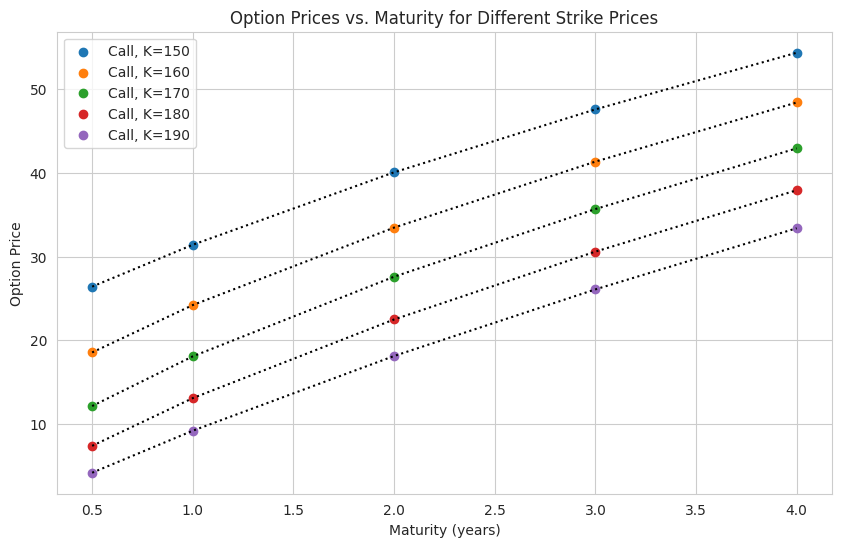

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

for K in strike_prices:
    plt.scatter(maturities, call_prices[K], label=f'Call, K={K}')
    plt.plot(maturities, call_prices[K], linestyle='dotted', color='black')  # Connect scatter points with dotted lines

plt.title('Option Prices vs. Maturity for Different Strike Prices')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


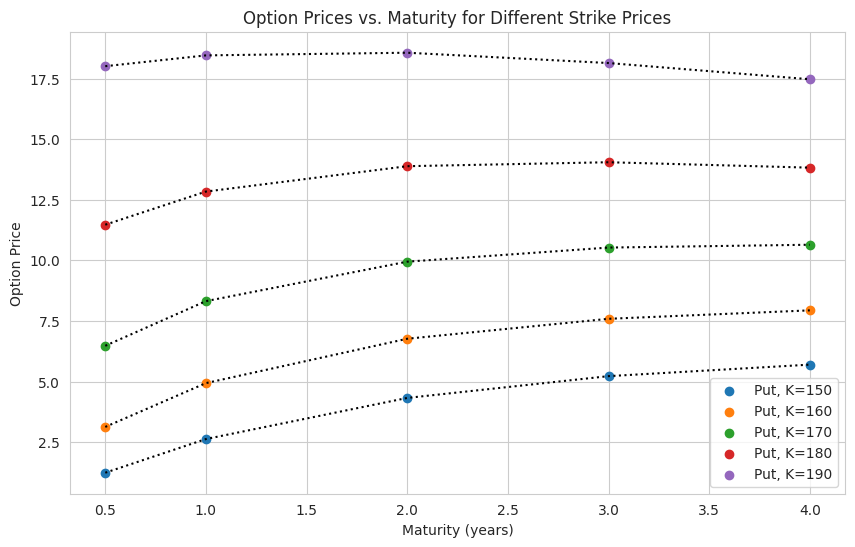

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

for K in strike_prices:
    plt.scatter(maturities, put_prices[K], label=f'Put, K={K}')
    plt.plot(maturities, put_prices[K], linestyle='dotted', color='black')  # Connect scatter points with dotted lines

plt.title('Option Prices vs. Maturity for Different Strike Prices')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Initialize lists to store data
strike_prices_list = []
maturities_list = []
call_prices_list = []
put_prices_list = []

# Calculate and store option prices for each combination of strike prices and maturities
for K in strike_prices:
    for T in maturities:
        call_price_bs = black_scholes(S0, K, T, r, sigma, option_type='call')
        put_price_bs = black_scholes(S0, K, T, r, sigma, option_type='put')

        # Append values to respective lists
        strike_prices_list.append(K)
        maturities_list.append(T)
        call_prices_list.append(round(call_price_bs, 2))
        put_prices_list.append(round(put_price_bs, 2))

# Create a DataFrame
option_df = pd.DataFrame({
    'Strike Price': strike_prices_list,
    'Maturity': maturities_list,
    'Call Price': call_prices_list,
    'Put Price': put_prices_list
})

print("Predicted options prices for fixed strike price and time of maturity :- ")
print()
print(option_df)

Predicted options prices for fixed strike price and time of maturity :- 

    Strike Price  Maturity  Call Price  Put Price
0            150       0.5       26.42       1.24
1            150       1.0       31.42       2.63
2            150       2.0       40.08       4.32
3            150       3.0       47.60       5.22
4            150       4.0       54.37       5.70
5            160       0.5       18.56       3.13
6            160       1.0       24.22       4.93
7            160       2.0       33.47       6.77
8            160       3.0       41.36       7.59
9            160       4.0       48.42       7.94
10           170       0.5       12.15       6.48
11           170       1.0       18.09       8.32
12           170       2.0       27.60       9.95
13           170       3.0       35.69      10.53
14           170       4.0       42.94      10.65
15           180       0.5        7.40      11.47
16           180       1.0       13.10      12.84
17           180       2.0

# (7.) Increase the number of steps in Binomial model to verify that the price converges to 6.

In [ ]:
# Parameters
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
N_values = np.arange(1, 300, 1)  # List of number of steps
K = 170  # Strike price
T = 1  # Time to maturity (in years)

# Calculate option prices using Binomial model for different numbers of steps
call_prices_binomial = []
put_prices_binomial = []
for N in N_values:
    call_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    put_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
    call_prices_binomial.append(call_price_binomial)
    put_prices_binomial.append(put_price_binomial)


# (8.) Draw the graph to show 7.

## Step size 1

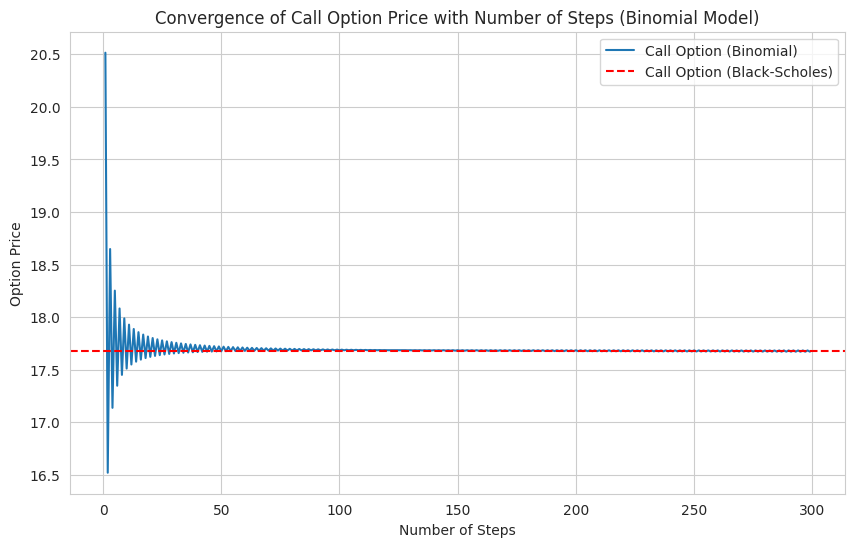

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot call option prices
plt.plot(N_values, call_prices_binomial, label='Call Option (Binomial)')
plt.axhline(y=black_scholes(S0, K, T, r, sigma, option_type='call'), color='r', linestyle='--', label='Call Option (Black-Scholes)')
plt.title('Convergence of Call Option Price with Number of Steps (Binomial Model)')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()

plt.grid(True)
plt.show()

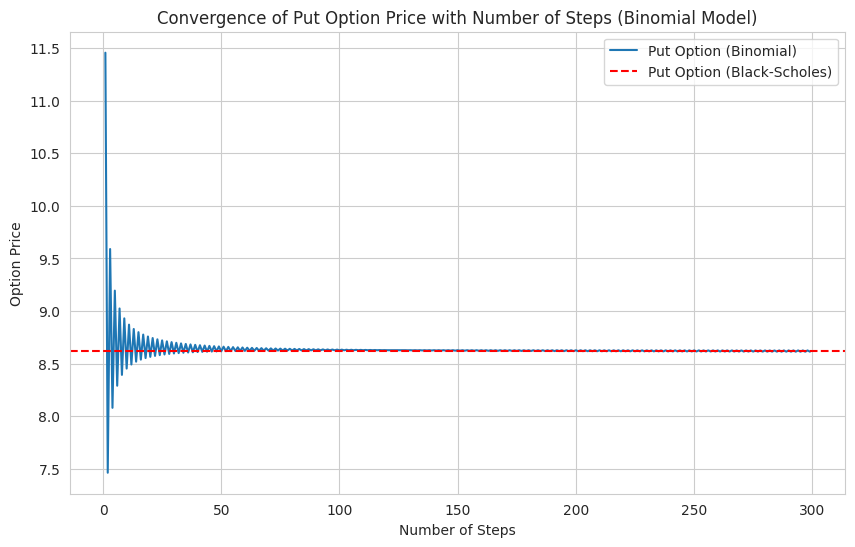

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot call option prices
plt.plot(N_values, put_prices_binomial, label='Put Option (Binomial)')
plt.axhline(y=black_scholes(S0, K, T, r, sigma, option_type='put'), color='r', linestyle='--', label='Put Option (Black-Scholes)')
plt.title('Convergence of Put Option Price with Number of Steps (Binomial Model)')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()

plt.grid(True)
plt.show()

## Step size 2

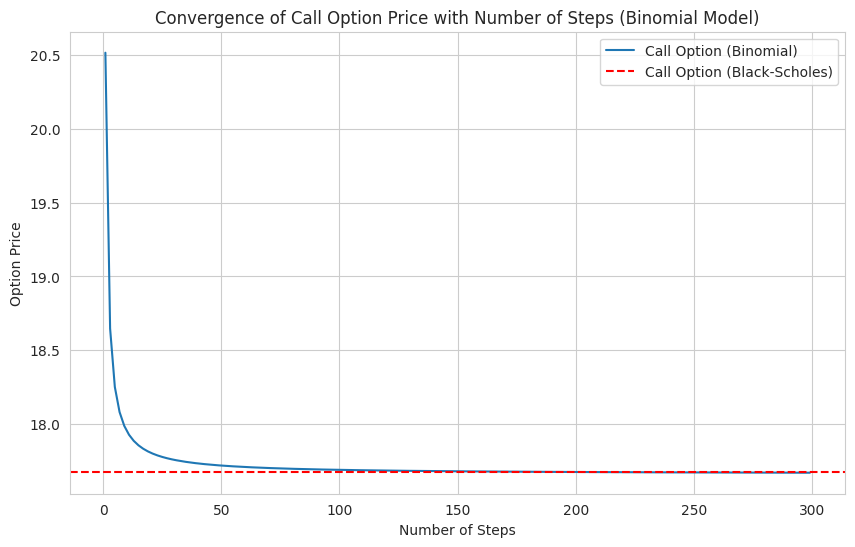

In [ ]:
# Parameters
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
N_values = np.arange(1, 300, 2)  # List of number of steps
K = 170  # Strike price
T = 1  # Time to maturity (in years)

# Calculate option prices using Binomial model for different numbers of steps
call_prices_binomial = []
put_prices_binomial = []
for N in N_values:
    call_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    put_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
    call_prices_binomial.append(call_price_binomial)
    put_prices_binomial.append(put_price_binomial)

# Plot results
plt.figure(figsize=(10, 6))

# Plot call option prices
plt.plot(N_values, call_prices_binomial, label='Call Option (Binomial)')
plt.axhline(y=black_scholes(S0, K, T, r, sigma, option_type='call'), color='r', linestyle='--', label='Call Option (Black-Scholes)')
plt.title('Convergence of Call Option Price with Number of Steps (Binomial Model)')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()

plt.grid(True)
plt.show()

## Step size 3

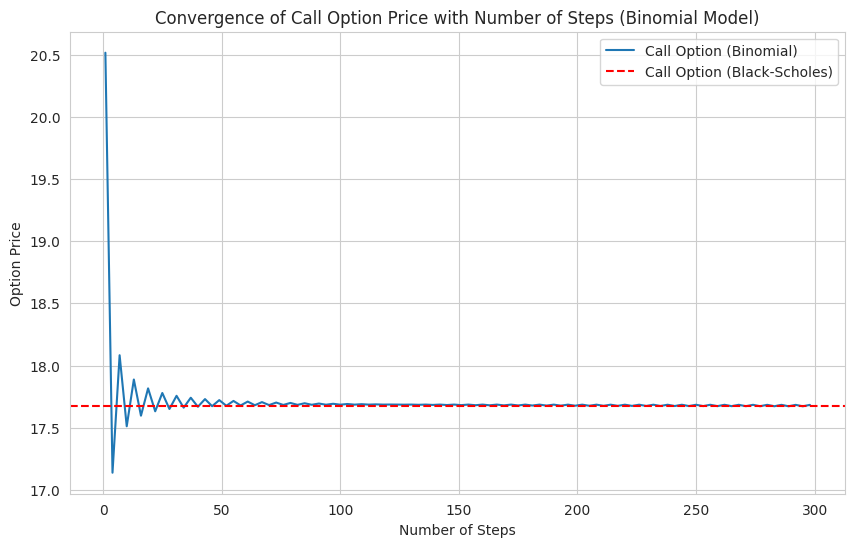

In [ ]:
# Parameters
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
N_values = np.arange(1, 300, 3)  # List of number of steps
K = 170  # Strike price
T = 1  # Time to maturity (in years)

# Calculate option prices using Binomial model for different numbers of steps
call_prices_binomial = []
put_prices_binomial = []
for N in N_values:
    call_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    put_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
    call_prices_binomial.append(call_price_binomial)
    put_prices_binomial.append(put_price_binomial)

# Plot results
plt.figure(figsize=(10, 6))

# Plot call option prices
plt.plot(N_values, call_prices_binomial, label='Call Option (Binomial)')
plt.axhline(y=black_scholes(S0, K, T, r, sigma, option_type='call'), color='r', linestyle='--', label='Call Option (Black-Scholes)')
plt.title('Convergence of Call Option Price with Number of Steps (Binomial Model)')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()

plt.grid(True)
plt.show()

## Step size 4

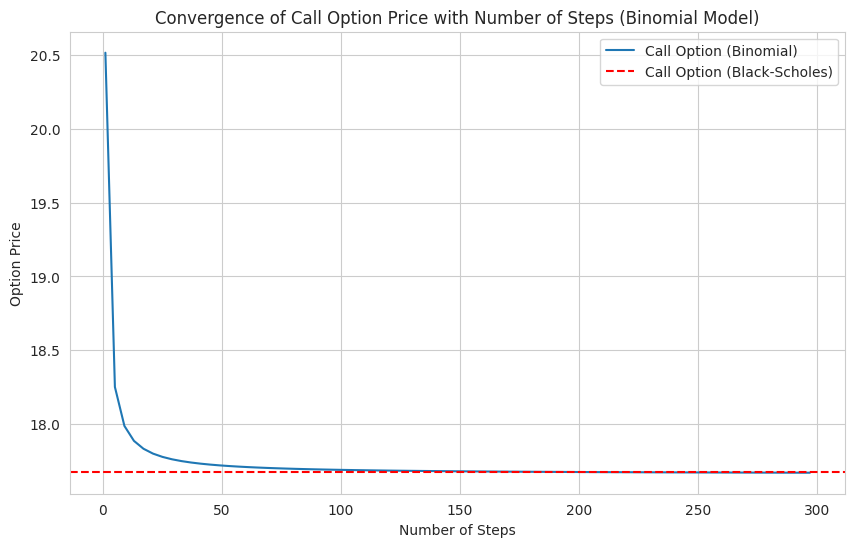

In [ ]:
# Parameters
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
N_values = np.arange(1, 300, 4)  # List of number of steps
K = 170  # Strike price
T = 1  # Time to maturity (in years)

# Calculate option prices using Binomial model for different numbers of steps
call_prices_binomial = []
put_prices_binomial = []
for N in N_values:
    call_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    put_price_binomial = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
    call_prices_binomial.append(call_price_binomial)
    put_prices_binomial.append(put_price_binomial)

# Plot results
plt.figure(figsize=(10, 6))

# Plot call option prices
plt.plot(N_values, call_prices_binomial, label='Call Option (Binomial)')
plt.axhline(y=black_scholes(S0, K, T, r, sigma, option_type='call'), color='r', linestyle='--', label='Call Option (Black-Scholes)')
plt.title('Convergence of Call Option Price with Number of Steps (Binomial Model)')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()

plt.grid(True)
plt.show()

# (9.) Compare with the actual market data

## Expiry after 3 Months

In [ ]:
# Read the CSV file
options_data = pd.read_csv('apple_july24_options.csv')

# Select the required columns
selected_columns = ['Strike', 'Ask', 'Type']

# Create a new DataFrame with only the selected columns
filtered_data = options_data[selected_columns].copy()

In [ ]:
# Assume you have functions to predict option prices using binomial and Black-Scholes models
def predict_binomial_price(row, S0, r, T, sigma, N):
    K = row['Strike']
    # val = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    # print(val)
    if row['Type'] == 'Call':
        predicted_call_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
        return round(predicted_call_price,2)
    elif row['Type'] == 'Put':
        # Prediction code for put option
        predicted_put_price = binomial_option_price(S0, K, T, r, sigma, N, option_type='put')
        return round(predicted_put_price,2)

def predict_black_scholes_price(row, S0, r, T, sigma):
    K = row['Strike']
    # val = binomial_option_price(S0, K, T, r, sigma, N, option_type='call')
    # print(val)
    if row['Type'] == 'Call':
        predicted_call_price = black_scholes(S0, K, T, r, sigma, option_type='call')
        return round(predicted_call_price,2)
    elif row['Type'] == 'Put':
        # Prediction code for put option
        predicted_put_price = black_scholes(S0, K, T, r, sigma, option_type='put')
        return round(predicted_put_price,2)

In [ ]:
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
T = 3/12
N = 1000

In [ ]:
# Apply the prediction functions to create new columns
filtered_data['Predicted_Binomial'] = filtered_data.apply(predict_binomial_price, axis=1, args=(S0, r, T, sigma, N))
filtered_data['Predicted_Black_Scholes'] = filtered_data.apply(predict_black_scholes_price, axis=1, args=(S0, r, T, sigma))

# Print the new DataFrame
print("Options Chain on the July 2024 expiry with predicted options prices")
print()
print(filtered_data)

Options Chain on the July 2024 expiry with predicted options prices

    Strike    Ask  Type  Predicted_Binomial  Predicted_Black_Scholes
0      120  51.50  Call               52.84                    52.84
1      125  46.70  Call               47.90                    47.90
2      130  41.90  Call               42.96                    42.96
3      135  37.10  Call               38.03                    38.03
4      140  32.45  Call               33.13                    33.13
5      145  27.90  Call               28.29                    28.29
6      150  23.60  Call               23.60                    23.60
7      155  19.50  Call               19.13                    19.13
8      160  15.75  Call               15.02                    15.01
9      165  12.35  Call               11.37                    11.37
10     170   9.40  Call                8.28                     8.28
11     175   6.95  Call                5.79                     5.79
12     180   5.00  Call           

In [ ]:
df = filtered_data

# Calculate absolute errors for call and put options
df['Error_Call'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Call')
df['Error_Put'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Put')

# Calculate mean errors for call and put options
mean_error_call = df['Error_Call'].mean()
mean_error_put = df['Error_Put'].mean()

print("Mean Error for Call Options:", round(mean_error_call,2))
print("Mean Error for Put Options:", round(mean_error_put,2))

Mean Error for Call Options: 0.76
Mean Error for Put Options: 2.71


### Call options graph

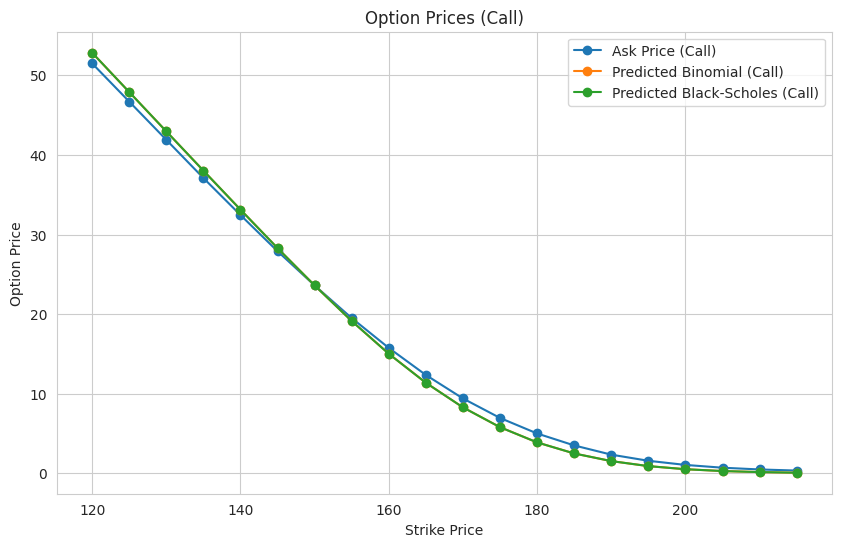

In [ ]:
# Plot for call options
plt.figure(figsize=(10, 6))
call_data = filtered_data[filtered_data['Type'] == 'Call']
plt.plot(call_data['Strike'], call_data['Ask'], label='Ask Price (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Binomial'], label='Predicted Binomial (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Call)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Call)')
plt.legend()
plt.grid(True)
plt.show()

### Put options graph

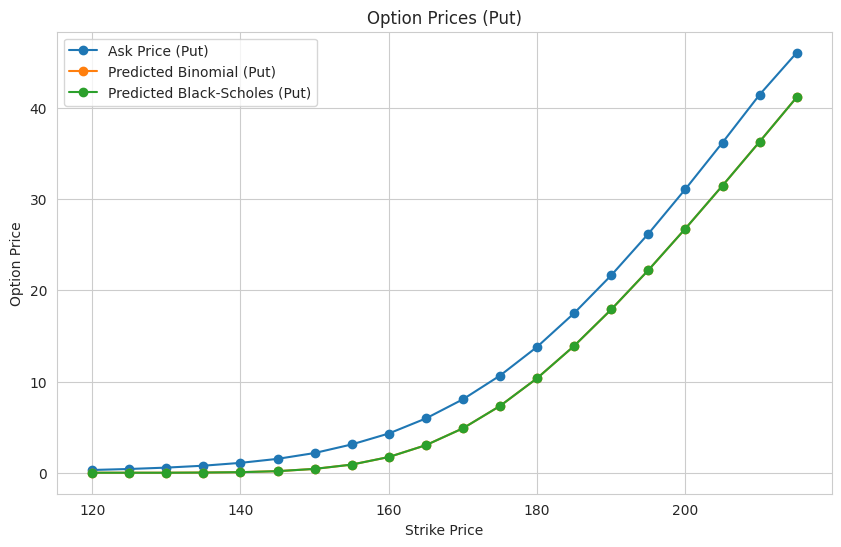

In [ ]:
# Plot for put options
plt.figure(figsize=(10, 6))
put_data = filtered_data[filtered_data['Type'] == 'Put']
plt.plot(put_data['Strike'], put_data['Ask'], label='Ask Price (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Binomial'], label='Predicted Binomial (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Put)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Put)')
plt.legend()
plt.grid(True)
plt.show()

## Expiry after 6 Months

In [ ]:
# Read the CSV file
options_data = pd.read_csv('apple_oct24_options.csv')

# Select the required columns
selected_columns = ['Strike', 'Ask', 'Type']

# Create a new DataFrame with only the selected columns
filtered_data = options_data[selected_columns].copy()

In [ ]:
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
T = 6/12
N = 1000

In [ ]:
# Apply the prediction functions to create new columns
filtered_data['Predicted_Binomial'] = filtered_data.apply(predict_binomial_price, axis=1, args=(S0, r, T, sigma, N))
filtered_data['Predicted_Black_Scholes'] = filtered_data.apply(predict_black_scholes_price, axis=1, args=(S0, r, T, sigma))

# Print the new DataFrame
print("Options Chain on the Oct 2024 expiry with predicted options prices")
print()
print(filtered_data)

Options Chain on the Oct 2024 expiry with predicted options prices

    Strike    Ask  Type  Predicted_Binomial  Predicted_Black_Scholes
0      120  53.80  Call               54.20                    54.20
1      125  49.10  Call               49.33                    49.33
2      130  44.55  Call               44.50                    44.50
3      135  40.05  Call               39.72                    39.72
4      140  35.70  Call               35.03                    35.03
5      145  31.50  Call               30.49                    30.49
6      150  27.50  Call               26.14                    26.14
7      155  23.70  Call               22.06                    22.06
8      160  20.15  Call               18.30                    18.30
9      165  16.85  Call               14.92                    14.92
10     170  13.90  Call               11.94                    11.94
11     175  11.25  Call                9.39                     9.39
12     180   9.00  Call            

In [ ]:
df = filtered_data

# Calculate absolute errors for call and put options
df['Error_Call'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Call')
df['Error_Put'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Put')

# Calculate mean errors for call and put options
mean_error_call = df['Error_Call'].mean()
mean_error_put = df['Error_Put'].mean()

print("Mean Error for Call Options:", round(mean_error_call,2))
print("Mean Error for Put Options:", round(mean_error_put,2))

Mean Error for Call Options: 1.12
Mean Error for Put Options: 3.3


### Call options Graph

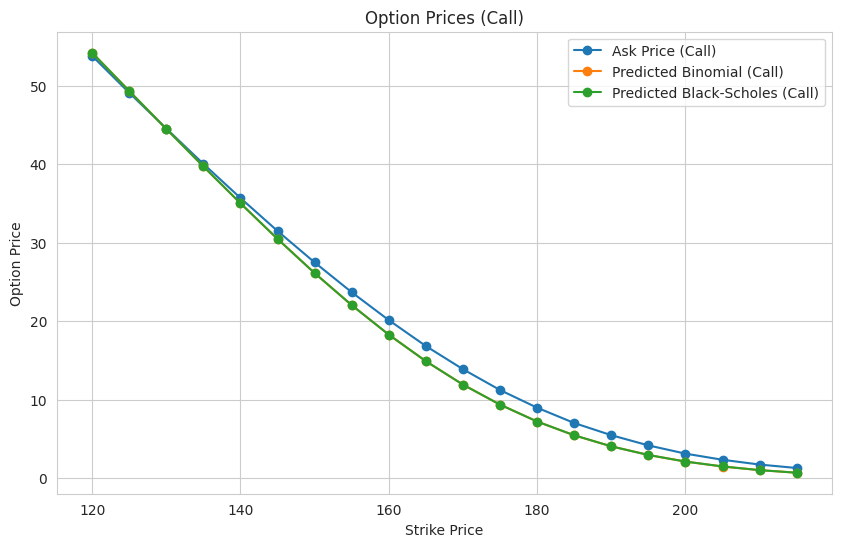

In [ ]:
# Plot for call options
plt.figure(figsize=(10, 6))
call_data = filtered_data[filtered_data['Type'] == 'Call']
plt.plot(call_data['Strike'], call_data['Ask'], label='Ask Price (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Binomial'], label='Predicted Binomial (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Call)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Call)')
plt.legend()
plt.grid(True)
plt.show()

### Put options graph

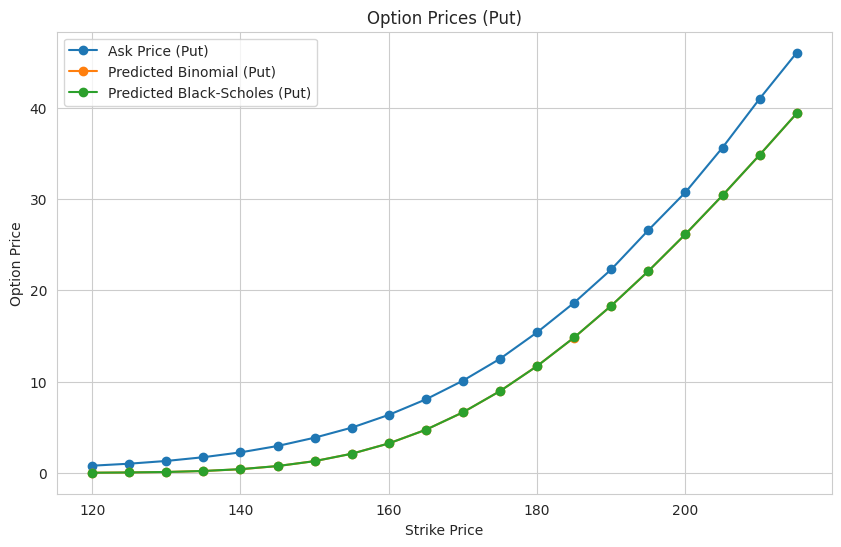

In [ ]:
# Plot for put options
plt.figure(figsize=(10, 6))
put_data = filtered_data[filtered_data['Type'] == 'Put']
plt.plot(put_data['Strike'], put_data['Ask'], label='Ask Price (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Binomial'], label='Predicted Binomial (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Put)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Put)')
plt.legend()
plt.grid(True)
plt.show()

## Expiry after 1 year

In [ ]:
# Read the CSV file
options_data = pd.read_csv('apple_mar25_options.csv')

# Select the required columns
selected_columns = ['Strike', 'Ask', 'Type']

# Create a new DataFrame with only the selected columns
filtered_data = options_data[selected_columns].copy()

In [ ]:
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
T = 11/12
N = 1000

In [ ]:
# Apply the prediction functions to create new columns
filtered_data['Predicted_Binomial'] = filtered_data.apply(predict_binomial_price, axis=1, args=(S0, r, T, sigma, N))
filtered_data['Predicted_Black_Scholes'] = filtered_data.apply(predict_black_scholes_price, axis=1, args=(S0, r, T, sigma))

# Print the new DataFrame
print("Options Chain on the March 2025 expiry with predicted options prices")
print()
print(filtered_data)

Options Chain on the March 2025 expiry with predicted options prices

    Strike    Ask  Type  Predicted_Binomial  Predicted_Black_Scholes
0      120  56.90  Call               56.52                    56.52
1      125  52.60  Call               51.84                    51.84
2      130  48.35  Call               47.23                    47.23
3      135  44.30  Call               42.72                    42.72
4      140  40.35  Call               38.35                    38.35
5      145  36.65  Call               34.15                    34.15
6      150  32.85  Call               30.16                    30.16
7      155  29.30  Call               26.40                    26.40
8      160  26.00  Call               22.91                    22.91
9      165  22.90  Call               19.71                    19.71
10     170  20.00  Call               16.80                    16.80
11     175  17.40  Call               14.20                    14.20
12     180  15.00  Call          

In [ ]:
df = filtered_data

# Calculate absolute errors for call and put options
df['Error_Call'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Call')
df['Error_Put'] = abs(df['Predicted_Black_Scholes'] - df['Ask']).where(df['Type'] == 'Put')

# Calculate mean errors for call and put options
mean_error_call = df['Error_Call'].mean()
mean_error_put = df['Error_Put'].mean()

print("Mean Error for Call Options:", round(mean_error_call,2))
print("Mean Error for Put Options:", round(mean_error_put,2))

Mean Error for Call Options: 2.29
Mean Error for Put Options: 4.94


### Call options graph

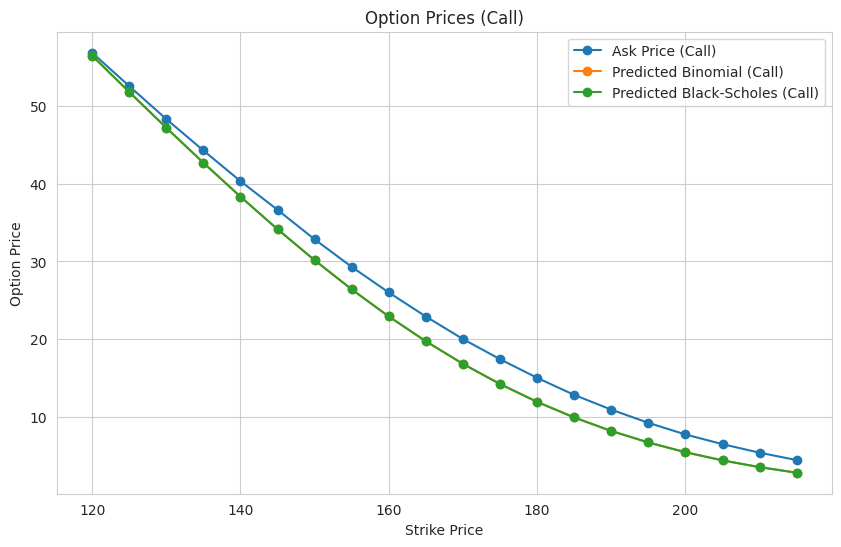

In [ ]:
# Plot for call options
plt.figure(figsize=(10, 6))
call_data = filtered_data[filtered_data['Type'] == 'Call']
plt.plot(call_data['Strike'], call_data['Ask'], label='Ask Price (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Binomial'], label='Predicted Binomial (Call)', marker='o')
plt.plot(call_data['Strike'], call_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Call)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Call)')
plt.legend()
plt.grid(True)
plt.show()

### Put options graph

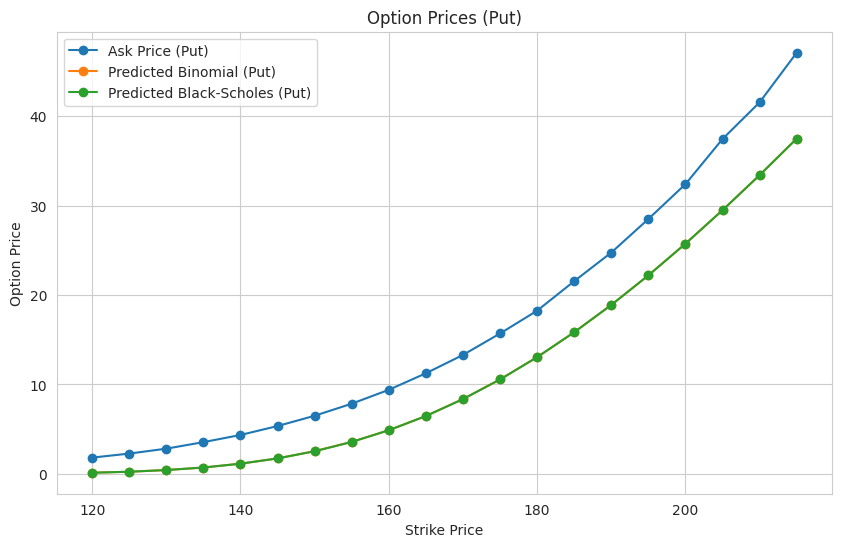

In [ ]:
# Plot for put options
plt.figure(figsize=(10, 6))
put_data = filtered_data[filtered_data['Type'] == 'Put']
plt.plot(put_data['Strike'], put_data['Ask'], label='Ask Price (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Binomial'], label='Predicted Binomial (Put)', marker='o')
plt.plot(put_data['Strike'], put_data['Predicted_Black_Scholes'], label='Predicted Black-Scholes (Put)', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices (Put)')
plt.legend()
plt.grid(True)
plt.show()

# (10.) Create a delta neutral portfolio

In [ ]:
def calculate_delta(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Delta values of a European call or put option using the Black-Scholes formula.

    Parameters:
        S (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility of the stock
        option_type (str): Type of option, either 'call' or 'put'

    Returns:
        float: Delta values
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == 'call':
        delta_value = norm.cdf(d1)
    elif option_type == 'put':
        delta_value = -norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    return delta_value

In [ ]:
# Parameters
S0 = round(stock_data['Adj Close'].iloc[-1], 2)  # Current stock price
r = round(treasury_rate, 2)  # Risk-free rate
sigma = annual_volatility  # Volatility
N = 1000  # Number of time steps
print("Current Stock Price :-", S0)
print("Risk-free rate :-", r)
print("Sigma :-",sigma)
print()

# Different strike prices and time periods
strike_prices = [150, 160, 170, 180, 190]
maturities = [1/2, 1, 2, 3, 4]

data = []
columns = ["Initial Stock Price", 'Strike Price', 'Maturity', 'Call Price', 'Put Price', 'Call Delta', 'Put Delta']
df = pd.DataFrame(data, columns=columns)

# Calculate and print option prices for each combination of strike prices and maturities
for K in strike_prices:
    for T in maturities:
        call_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='call'), 2)
        put_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='put'), 2)
        call_delta_value = round(calculate_delta(S0, K, T, r, sigma, option_type='call'), 2)
        put_delta_value = round(calculate_delta(S0, K, T, r, sigma, option_type='put'), 2)
        data.append([S0, K, T, call_price_bs, put_price_bs, call_delta_value, put_delta_value])

df = pd.DataFrame(data, columns=columns)
df

Current Stock Price :- 171.48
Risk-free rate :- 0.05
Sigma :- 0.19



,Initial Stock Price,Strike Price,Maturity,Call Price,Put Price,Call Delta,Put Delta
0,171.48,150,0.5,26.42,1.24,0.89,-0.11
1,171.48,150,1.0,31.42,2.63,0.86,-0.14
2,171.48,150,2.0,40.08,4.32,0.84,-0.16
3,171.48,150,3.0,47.60,5.22,0.85,-0.15
4,171.48,150,4.0,54.37,5.70,0.86,-0.14
5,171.48,160,0.5,18.56,3.13,0.78,-0.22
6,171.48,160,1.0,24.22,4.93,0.77,-0.23
7,171.48,160,2.0,33.47,6.77,0.78,-0.22
8,171.48,160,3.0,41.36,7.59,0.80,-0.20
9,171.48,160,4.0,48.42,7.94,0.82,-0.18


## Portfolio design example using delta hedging

In [ ]:
# Parameters
S0 = round(stock_data['Adj Close'].iloc[-1], 2)  # Current stock price
r = round(treasury_rate, 2)  # Risk-free rate
sigma = annual_volatility  # Volatility
N = 1000  # Number of time steps
print("Current Stock Price :-", S0)
print("Risk-free rate :-", r)
print("Sigma :-",sigma)
print()

K = 165  # List of strike prices
T = 1  # List of maturities (in years)

data = []
columns = ["Initial Stock Price", 'Strike Price', 'Maturity', 'Call Price', 'Put Price', 'Call Delta', 'Put Delta']
df = pd.DataFrame(data, columns=columns)

call_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='call'), 2)
put_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='put'), 2)
call_delta_value = round(calculate_delta(S0, K, T, r, sigma, option_type='call'), 2)
put_delta_value = round(calculate_delta(S0, K, T, r, sigma, option_type='put'), 2)
data.append([S0, K, T, call_price_bs, put_price_bs, call_delta_value, put_delta_value])

df = pd.DataFrame(data, columns=columns)
df

Current Stock Price :- 171.48
Risk-free rate :- 0.05
Sigma :- 0.19



,Initial Stock Price,Strike Price,Maturity,Call Price,Put Price,Call Delta,Put Delta
0,171.48,165,1,21.01,6.49,0.71,-0.29


In [ ]:
print(f"value of portfolio for delta hedging, V(S) = xS + y + zD(S)")

lot_size = 1000
x = call_delta_value * lot_size
option_sell_cash = lot_size * call_price_bs
y = -round(x * S0 - option_sell_cash, 2)
z = -lot_size
print(f"value of portfolio for delta hedging, V(S) = {x} * S + {y} + {z} * D(S)")

stock_investment = round(x * S0, 2)
money_borrow = y
option_investment = round(z * call_price_bs, 2)
total = round(stock_investment + money_borrow + option_investment, 2)
data_hedging = [["Stock", x,  stock_investment], ["money", "-", money_borrow], ["Option", lot_size, option_investment], ["Total", "-", total]]

# Create a DataFrame for data_hedging
df_hedging = pd.DataFrame(data_hedging, columns=["Instrument", "Quantity", "Value"])
df_hedging

value of portfolio for delta hedging, V(S) = xS + y + zD(S)
value of portfolio for delta hedging, V(S) = 710.0 * S + -100740.8 + -1000 * D(S)


,Instrument,Quantity,Value
0,Stock,710.0,121750.8
1,money,-,-100740.8
2,Option,1000,-21010.0
3,Total,-,0.0


### Hedging Chain

In [ ]:
df = pd.read_csv("apple.csv")
df['date'] = pd.to_datetime(df['Date'])
## Maturity = time to expiration in years, 252 trading days
df['Maturity'] = (pd.to_datetime('2024-01-19') - df['date']).dt.days / 252
df = df.drop(["date", "Unnamed: 0"], axis=1)
df.head(5)

,Date,Underlying,C170,C175,C180,C185,C190,P170,P175,P180,P185,P190,Maturity
0,2023-08-21,175.84,16.40,13.27,10.30,7.85,5.91,6.81,8.65,10.85,13.35,16.50,0.599206
1,2023-08-22,177.23,17.50,14.10,11.10,8.51,6.34,6.26,8.10,10.10,12.75,15.50,0.595238
2,2023-08-23,181.12,20.20,16.65,13.45,10.55,8.08,5.25,6.71,8.50,10.70,13.33,0.591270
3,2023-08-24,176.38,16.97,13.75,10.80,8.35,6.25,6.85,8.62,10.75,13.35,16.60,0.587302
4,2023-08-25,178.61,18.50,15.15,11.85,9.19,6.90,5.90,7.50,9.50,11.90,14.81,0.583333


In [ ]:
df2 = pd.read_csv("daily-treasury-rates.csv")
df2 = df2[['Date', '13 WEEKS COUPON EQUIVALENT']]
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2 = df2[df2['Date'] >= '2023-08-21']
df2['13 WEEKS COUPON EQUIVALENT'] = df2['13 WEEKS COUPON EQUIVALENT'] / 100
df2.head(10)

,Date,13 WEEKS COUPON EQUIVALENT
0,2023-11-30,0.0541
1,2023-11-29,0.0541
2,2023-11-28,0.0543
3,2023-11-27,0.0544
4,2023-11-24,0.0544
5,2023-11-22,0.0543
6,2023-11-21,0.0542
7,2023-11-20,0.0543
8,2023-11-17,0.0541
9,2023-11-16,0.0541


In [ ]:
df_result = pd.merge(df, df2, on='Date', how='left')
df_result.rename({"13 WEEKS COUPON EQUIVALENT": "Interest rate"}, axis="columns", inplace=True)
df_result['Interest rate'].fillna(df_result['Interest rate'].median(), inplace=True)
df_result.head(10)

,Date,Underlying,C170,C175,C180,C185,C190,P170,P175,P180,P185,P190,Maturity,Interest rate
0,2023-08-21,175.84,16.40,13.27,10.30,7.85,5.91,6.81,8.65,10.85,13.35,16.50,0.599206,0.0546
1,2023-08-22,177.23,17.50,14.10,11.10,8.51,6.34,6.26,8.10,10.10,12.75,15.50,0.595238,0.0546
2,2023-08-23,181.12,20.20,16.65,13.45,10.55,8.08,5.25,6.71,8.50,10.70,13.33,0.591270,0.0546
3,2023-08-24,176.38,16.97,13.75,10.80,8.35,6.25,6.85,8.62,10.75,13.35,16.60,0.587302,0.0547
4,2023-08-25,178.61,18.50,15.15,11.85,9.19,6.90,5.90,7.50,9.50,11.90,14.81,0.583333,0.0550
5,2023-08-28,180.19,19.40,16.00,12.55,9.85,7.45,5.45,6.90,8.60,10.95,13.86,0.571429,0.0550
6,2023-08-29,184.12,22.03,18.50,14.95,11.75,9.20,4.30,5.50,7.14,9.07,11.40,0.567460,0.0549
7,2023-08-30,187.65,24.62,20.82,17.18,14.00,10.93,3.51,4.58,5.93,7.60,9.60,0.563492,0.0548
8,2023-08-31,187.87,24.97,21.10,17.40,14.06,11.05,3.45,4.50,5.80,7.40,9.50,0.559524,0.0548
9,2023-09-01,189.46,26.00,21.70,18.30,14.86,11.80,3.10,4.00,5.25,6.77,8.71,0.555556,0.0546


### Simulation of Delta Hedging on single option

In [ ]:
def delta_hedging(option_chain, strike_price, col, freq, option_type, costs = 0):
    lot_size = 1000    ## no. of options in a bundle to be bought or sell at a time
    r = option_chain.iloc[0]['Interest rate']    ## Risk-free rate at t=0
    S0 = option_chain.iloc[0]['Underlying']    ## Stock price of share at t=0
    K = strike_price    ## Strike price
    C0 = option_chain.iloc[0][col]    ## Opiton price at t = 0
    T = option_chain.iloc[0]['Maturity']     ## Time of expiry of option

    ## Initial volatility of stock is calculated using implied volatility of option
    sigma = implied_volatility(C0, S0, K, T, r, flag='c')

    ## Inbuilt function for Black-Scholes
    bsm_result = BSM(S0=S0, K=K, T=T, r=r, sigma=sigma, kind='call')

    single_option_price = bsm_result.value()
    delta_value = bsm_result.delta()
    lot_option_price = single_option_price * lot_size ## z * D(S)

    num_stocks = - delta_value * lot_size ## x
    stock_price_total = num_stocks * S0     ## X * S(0)

    MSE = []
    delta_portfolio_values = [lot_option_price + stock_price_total]  ## V(S)

    option_prices = [lot_option_price]
    stock_prices = [stock_price_total]

    y = 0               ## transaction cost = borrowing

    ## Iterate over each day of the dataset and update delta values on freq
    for i in range(1, len(option_chain)-1):
        delta_portfolio_values.append(lot_option_price + stock_price_total + y)

        new_option_price_lot = option_chain[col][i] * lot_size
        new_stock_price_total = - delta_value * option_chain['Underlying'][i] * lot_size
        diff_option_price = new_option_price_lot - lot_option_price
        diff_stock_price_total = new_stock_price_total - stock_price_total

        ## V(S) should be ideally 0, because of hedging
        ## We calculate the error caused
        a_0 = diff_option_price + diff_stock_price_total
        MSE.append(a_0 ** 2)

        option_prices.append(new_option_price_lot)
        stock_prices.append(new_stock_price_total)

        ## Update new option and stock prices
        lot_option_price = new_option_price_lot
        stock_price_total = new_stock_price_total

        # As time goes by, the stock price moves/changes. This will affect the delta_value of the stock option, delta_value of the underlying is always 1
        # In a real world scenario this hedging costs money

        ## Rehedging at freq
        if i % freq == 0:
            # delta_value and sigma will be updated when we rehedge
            bsm_result = BSM(S0=option_chain['Underlying'][i], K=K, T=option_chain['Maturity'][i], r=option_chain['Interest rate'][i], sigma=sigma, kind='call')
            delta_value = bsm_result.delta()
            sigma = bsm_result.implied_vol(option_chain[col][i])

            ## Readjusting the portfolio V(S) = xS + y + z D(S)
            ## by short selling the delta x of stocks, x = delta * lot size

            stock_price_total = -(delta_value * option_chain['Underlying'][i] * lot_size)
            # or just the x
            x = -(delta_value * lot_size)
            if x < 0:
                print(f"Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: {-round(x, 2)}")
                # Include trading costs in portfolio value
                y -= costs * 100000
            elif x > 0:
                print(f"Readjusting portfolio components V(S), total options amount bought to make V(S) = 0: {round(x, 2)}")
                # Include trading costs in portfolio value
                y -= costs * 100000
            else:
                print('Portfolio is in balance V(S) = 0, no readjustment required!! \n')

    total_MSE = sum(MSE) - MSE[-1]
    total_MSE /= (len(MSE) - 1)
    print(f"Total MSE : {total_MSE}\n")

    return MSE, total_MSE, delta_portfolio_values, option_prices, stock_prices


### daily MSE vs hedging frequencies

Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 722.64
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 767.96
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 711.21
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 735.04
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 755.5
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 802.8
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 849.39
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 862.72
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 868.92
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 884.39
Readjusting portfolio components V(S), tot

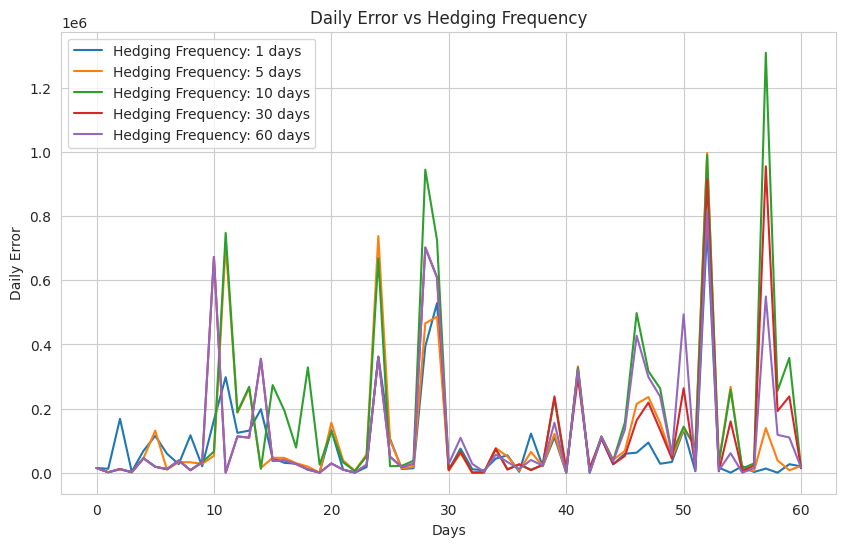

In [ ]:
hedging_frequencies = [1, 5, 10, 30, 60]
total_MSEs = []
plt.figure(figsize=(10, 6))
for freq in hedging_frequencies:
    MSE, total_MSE, delta_portfolio_values, option_prices, stock_prices = delta_hedging(df_result, 170, "C170",  freq, 'Call')
    total_MSEs.append(total_MSE)

    plt.plot(MSE, label=f'Hedging Frequency: {freq} days')

plt.xlabel('Days')
plt.ylabel('Daily Error')
plt.title('Daily Error vs Hedging Frequency')
plt.legend()
plt.show()

### total MSE vs hedging frequencies

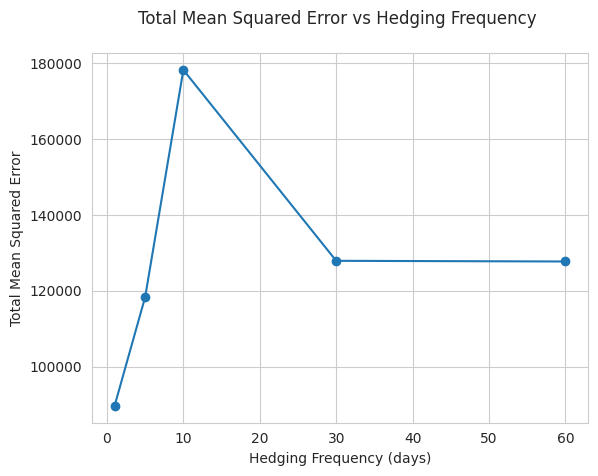

In [ ]:
# Plotting
plt.plot(hedging_frequencies, total_MSEs, marker='o')
plt.xlabel('Hedging Frequency (days)')
plt.ylabel('Total Mean Squared Error')
plt.title('Total Mean Squared Error vs Hedging Frequency \n')
plt.show()

### delta portfolio values vs transaction cost

Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 722.64
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 767.96
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 711.21
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 735.04
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 755.5
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 802.8
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 849.39
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 862.72
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 868.92
Readjusting portfolio components V(S), total options amount short/sell to make V(S) = 0: 884.39
Readjusting portfolio components V(S), tot

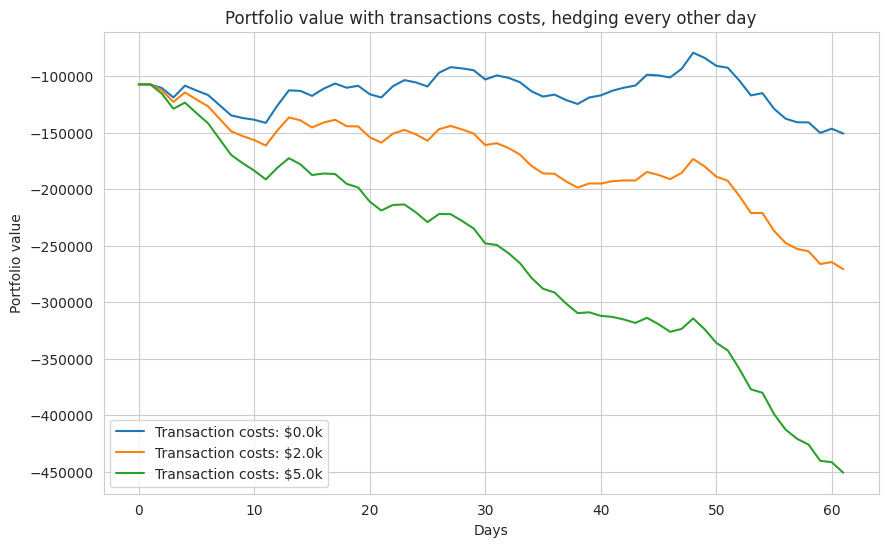

In [ ]:
costs = [0.00, 0.02, 0.05]
plt.figure(figsize=(10, 6))
for c in costs:
    MSE, total_MSE, delta_portfolio_values, option_prices, stock_prices = delta_hedging(df_result, 170, "C170",  1, 'Call', c)
    plt.plot(delta_portfolio_values, label=f'Transaction costs: ${c*100}k')

plt.xlabel('Days')
plt.ylabel('Portfolio value')
plt.title('Portfolio value with transactions costs, hedging every other day')
plt.legend()
plt.show()


# (11.) Use numerical methods to get implied volatility.

In [ ]:
def vega(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    """
    Calculate the Vega of an option using the Black-Scholes formula.

    Parameters:
        stock_price (float): Current stock price
        strike_price (float): Strike price
        time_to_maturity (float): Time to maturity (in years)
        risk_free_rate (float): Risk-free interest rate
        volatility (float): Volatility of the stock

    Returns:
        float: Vega value
    """
    # Calculate d1 using Black-Scholes formula
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))

    # Calculate Vega
    vega_value = stock_price * np.sqrt(time_to_maturity) * norm.pdf(d1)

    return vega_value

In [ ]:
def calculate_implied_volatility(S, K, T, r, market_price, option_type='call', initial_guess=0.5, tol=1e-6, max_iter=100):
    """
    Calculate implied volatility using the Newton-Raphson method.

    Args:
    S: Current stock price
    K: Option strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    market_price: Market price of the option
    option_type: Type of option, either 'call' or 'put'
    initial_guess: Initial guess for implied volatility
    tol: Tolerance level for convergence
    max_iter: Maximum number of iterations

    Returns:
    implied_vol: Implied volatility
    """
    sigma = initial_guess
    for i in range(max_iter):
        if option_type == 'call':
            option_price = black_scholes(S, K, T, r, sigma, 'call')
        elif option_type == 'put':
            option_price = black_scholes(S, K, T, r, sigma, 'put')
        else:
            raise ValueError("Option type must be 'call' or 'put'")

        v = vega(S, K, T, r, sigma)
        diff = option_price - market_price
        if abs(diff) < tol:
            return sigma
        sigma -= diff / v
    return sigma


In [ ]:
# Parameters
S0 = 176.55  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
T = 7/365  # Time to maturity (in years)
K = 167.5  # Strike price
market_price = 9.54

implied_vol = calculate_implied_volatility(S0, K, T, r, market_price)
print("Implied Volatility:", implied_vol)
print("Inbuilt Implied Volatility: ", implied_volatility(price=market_price, S=S0, K=K, t=T, r=r, flag='c'))


Implied Volatility: 0.30236390716546163
Inbuilt Implied Volatility:  0.30236390662353063


## Finding implied volatility for Apple options

In [ ]:
# Read the CSV file
options_data = pd.read_csv('apple_mar25_options.csv')

# Select the required columns
selected_columns = ['Strike', 'Ask', 'Type']

# Create a new DataFrame with only the selected columns
filtered_data = options_data[selected_columns].copy()

In [ ]:
S0 = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = treasury_rate  # Risk-free rate
sigma = annual_volatility  # Volatility
T = 1
N = 1000

In [ ]:
data = []
columns = ["Stock Price", 'Strike Price', 'Maturity', 'Ask', 'Option Type', 'Option Price', 'Calculated Implied volatility', 'Inbuilt Implied volatility']
df = pd.DataFrame(data, columns=columns)

for index, row in filtered_data.iterrows():
    K = row['Strike']
    market_price = row['Ask']
    option_type = row['Type']

    # Calculate implied volatility
    if option_type == 'Call':
        option_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='call'), 2)
        implied_vol = round(calculate_implied_volatility(S0, K, T, r, market_price, 'call'), 6)
        inbuilt_implied_vol = round(implied_volatility(price=market_price, S=S0, K=K, t=T, r=r, flag='c'), 6)
    elif option_type == 'Put':
        option_price_bs = round(black_scholes(S0, K, T, r, sigma, option_type='put'), 2)
        implied_vol = round(calculate_implied_volatility(S0, K, T, r, market_price, 'put'), 6)
        inbuilt_implied_vol = round(implied_volatility(price=market_price, S=S0, K=K, t=T, r=r, flag='p'), 6)
    else:
        implied_vol = None
        inbuilt_implied_vol = None

    data.append([S0, K, 1, market_price, option_type, option_price_bs, implied_vol, inbuilt_implied_vol])
df = pd.DataFrame(data, columns=columns)
df

,Stock Price,Strike Price,Maturity,Ask,Option Type,Option Price,Calculated Implied volatility,Inbuilt Implied volatility
0,171.479996,120,1,56.90,Call,56.99,0.169923,0.169923
1,171.479996,125,1,52.60,Call,52.35,0.212306,0.212306
2,171.479996,130,1,48.35,Call,47.78,0.223157,0.223157
3,171.479996,135,1,44.30,Call,43.33,0.231340,0.231340
4,171.479996,140,1,40.35,Call,39.01,0.234554,0.234554
5,171.479996,145,1,36.65,Call,34.86,0.238336,0.238336
6,171.479996,150,1,32.85,Call,30.91,0.234619,0.234619
7,171.479996,155,1,29.30,Call,27.20,0.232298,0.232298
8,171.479996,160,1,26.00,Call,23.75,0.230735,0.230735
9,171.479996,165,1,22.90,Call,20.57,0.228760,0.228760
